In [1]:
include("../sym_cliff.jl")
using Plots
using Statistics

In [2]:
function phi_sim(N, n_step, lag, gate, step_size=1)
    
    state = all_plus(N)
    result = []
    
    for _ in 1:lag
        for i in 1:2:N
            gate(state, i, i % N + 1)
        end
        for i in 2:2:N
            gate(state, i, i % N + 1)
        end
    end
    
    for t in 1:n_step
        push!(result, cal_phi(state, true))
        
        for _ in 1:step_size 
            for i in 1:2:N
                gate(state, i, i % N + 1)
            end
            for i in 2:2:N
                gate(state, i, i % N + 1)
            end
        end
    end
    
    return result
end

phi_sim (generic function with 2 methods)

In [7]:
N_list = 16:16:512
n_step = 1000
r = 1
p = 0.39
sym = true
ee = 100


gate = mixed_gate(r, p, sym)
result = []

for N in N_list
    a = mean(phi_sim(N, n_step, 1000, gate, 8))
    push!( result, a)
    print(N, " ")
end

16 32 48 64 80 96 112 128 144 160 176 192 208 224 240 256 272 288 304 320 336 352 368 384 400 416 432 448 464 480 496 512 

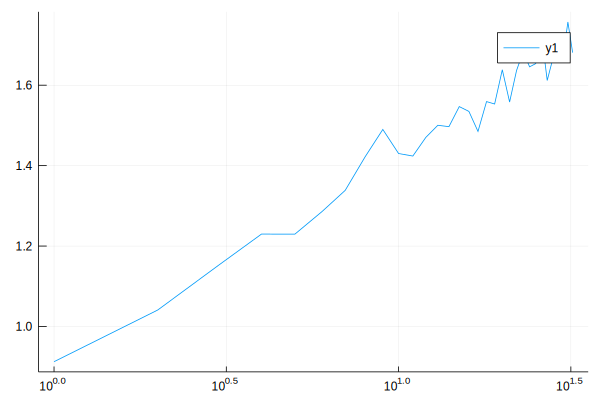

In [8]:
plot(result, xaxis=:log)

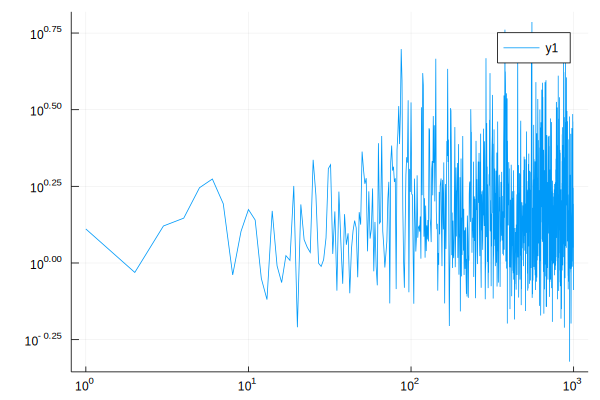

In [12]:
ii=phi_sim(512, 1000, 0, gate, 8)
plot(ii[2:end], yaxis=:log, xaxis=:log )